<a href="https://colab.research.google.com/github/Pavimohan9/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CHENNAI HOUSE PRICE PREDICTION model using a machine learning algorithm. This model predicts the price of Chennai's house with the help of few parameters like Sales Price, Square feet, rooms, conditions, etc.,

Importing necessary libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from datetime import datetime, date

In [9]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import xgboost as xgb
from xgboost import XGBRegressor

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [12]:
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import sys
from impyute.imputation.cs import fast_knn

Reading the Dataset

In [14]:
df = pd.read_csv('/content/train-chennai-sale.csv')

Displaying the rows and columns of the Dataframe

In [15]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


Finding no. of rows and columns in the dataframe

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

Finding mean, median, minimum, maximum, standard deviation, quartile values

In [17]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [18]:
df.shape

(7109, 22)

Find how many null values present in the dataframe

In [19]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

Create a new column of House age using Build date and Sold date

In [20]:
df['HOUSE_AGE'] = pd.to_datetime(df['DATE_SALE']).apply(lambda x:x.year) - pd.to_datetime(df['DATE_BUILD']).apply(lambda x:x.year)

Removing the DATE_SALE, DATE_BUILD and PRT_ID columns as they have no impact in our model building

In [21]:
df.drop(columns = ['DATE_SALE', 'DATE_BUILD', 'PRT_ID'])

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,49
7105,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,9
7106,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410,28
7107,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,32


In [22]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


Dropping duplicates from the dataframe

In [23]:
df = df.drop_duplicates()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [25]:
# There are 7109 rows/ 20 columns (after deleting date_build & date_sale, added House age)
# PRT_ID dont derive any value to build model, we can delete
# There are no duplicates in dataset there are null values to be replaced or removed
# N_BATHROOM, N_BEDROOM, QS_OVERALL has null values
# Cant predict null values, so we can remove null records or replace we can mean/mode values or we can impyute to replace values

Spelling check and correction to get common values

In [26]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [27]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [28]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [29]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [30]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [31]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [32]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [33]:
df = df.replace({'AREA':{'Karapakam':'Karapakkam', 
                         'Ana Nagar':'Anna Nagar',
                         'Ann Nagar':'Anna Nagar',
                         'Adyr':'Adyar',
                         'Velchery':'Velachery',
                         'Chrompt':'Chrompet',
                         'Chormpet':'Chrompet',
                         'Chrmpet':'Chrompet',
                         'KKNagar':'KK Nagar',
                         'TNagar':'T Nagar'
                         },
                 'SALE_COND':{'Ab  Normaal':'AbNormal','Ab Normal':'AbNormal','PartiaLl':'Partial','Partiall':'Partial','Adj Land':'AdjLand'},
                 'PARK_FACIL':{'Noo':'No'},
                 'BUILDTYPE':{'Comercial':'Commercial','Other':'Others'},
                 'UTILITY_AVAIL':{'All Pub':'AllPub','NoSewr ':'NoSewr','NoSeWa': 'NoSewr'},
                 'STREET':{'Pavd':'Paved','NoAccess':'No Access'}
})

In [34]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [35]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [36]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [37]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [38]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr'], dtype=object)

In [39]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [40]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

Reindexing coulmns

In [41]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'HOUSE_AGE'],
      dtype='object')

In [42]:
df=df.reindex(columns=['AREA','INT_SQFT', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL','STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL','House_Age', 'DIST_MAINROAD','REG_FEE', 'COMMIS','SALES_PRICE'])
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,House_Age,DIST_MAINROAD,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,NaN,131,380000,144400,7600000
1,Anna Nagar,1986,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,NaN,26,760122,304049,21717770
2,Adyar,909,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,NaN,70,421094,92114,13159200
3,Velachery,1855,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,NaN,14,356321,77042,9630290
4,Karapakkam,1226,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,NaN,84,237000,74063,7406250


Null Values imputation using KNN

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   N_BEDROOM      7108 non-null   float64
 3   N_BATHROOM     7104 non-null   float64
 4   N_ROOM         7109 non-null   int64  
 5   SALE_COND      7109 non-null   object 
 6   PARK_FACIL     7109 non-null   object 
 7   BUILDTYPE      7109 non-null   object 
 8   UTILITY_AVAIL  7109 non-null   object 
 9   STREET         7109 non-null   object 
 10  MZZONE         7109 non-null   object 
 11  QS_ROOMS       7109 non-null   float64
 12  QS_BATHROOM    7109 non-null   float64
 13  QS_BEDROOM     7109 non-null   float64
 14  QS_OVERALL     7061 non-null   float64
 15  House_Age      0 non-null      float64
 16  DIST_MAINROAD  7109 non-null   int64  
 17  REG_FEE        7109 non-null   int64  
 18  COMMIS  

Replacing Null values with nearest best values which fit them according to available dataset

In [44]:
# import sys
# impyute.imputations.cs import fast_knn

In [45]:
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS
print('Number of null values in columns:',np.isnan(df[['N_BATHROOM']].values).sum())
# start the KNN training
imputed_training=fast_knn(df[['N_BATHROOM']].values, k=30)
print('Number of null values after k-NN imputation:',np.isnan(imputed_training).sum())
df_BATHROOM = pd.DataFrame(imputed_training, columns = ['N_BATHROOM'])
#df_BATHROOM
df['N_BATHROOM']=df_BATHROOM

Number of null values in columns: 5
Number of null values after k-NN imputation: 0


In [46]:
print('Number of null values in columns:',np.isnan(df[['N_BEDROOM']].values).sum())
imputed_training=fast_knn(df[['N_BEDROOM']].values, k=30)
print('Number of null values after k-NN imputation:',np.isnan(imputed_training).sum())
df_BEDROOM = pd.DataFrame(imputed_training, columns = ['N_BEDROOM'])
df['N_BEDROOM']=df_BEDROOM

Number of null values in columns: 1
Number of null values after k-NN imputation: 0


In [47]:
print('Number of null values in columns:',np.isnan(df[['QS_OVERALL']].values).sum())
imputed_training=fast_knn(df[['QS_OVERALL']].values, k=30)
print('Number of null values after k-NN imputation:',np.isnan(imputed_training).sum())
df_OVERALL = pd.DataFrame(imputed_training, columns = ['QS_OVERALL'])
df['QS_OVERALL']=df_OVERALL

Number of null values in columns: 48
Number of null values after k-NN imputation: 0


All Null values replaced with appropriate values using KNN imputation

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   N_BEDROOM      7109 non-null   float64
 3   N_BATHROOM     7109 non-null   float64
 4   N_ROOM         7109 non-null   int64  
 5   SALE_COND      7109 non-null   object 
 6   PARK_FACIL     7109 non-null   object 
 7   BUILDTYPE      7109 non-null   object 
 8   UTILITY_AVAIL  7109 non-null   object 
 9   STREET         7109 non-null   object 
 10  MZZONE         7109 non-null   object 
 11  QS_ROOMS       7109 non-null   float64
 12  QS_BATHROOM    7109 non-null   float64
 13  QS_BEDROOM     7109 non-null   float64
 14  QS_OVERALL     7109 non-null   float64
 15  House_Age      0 non-null      float64
 16  DIST_MAINROAD  7109 non-null   int64  
 17  REG_FEE        7109 non-null   int64  
 18  COMMIS  

Converting float to int, Changing to proper datatypes

In [49]:
df['N_BEDROOM'] = df['N_BEDROOM'].astype('int')
df['N_BATHROOM'] = df['N_BATHROOM'].astype('int')
df.dtypes

AREA              object
INT_SQFT           int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
House_Age        float64
DIST_MAINROAD      int64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

Checking the Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


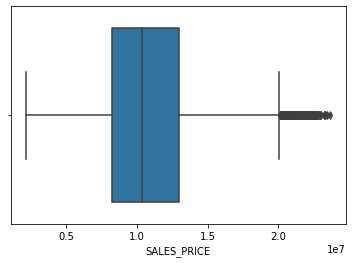

In [50]:
sns.boxplot(df['SALES_PRICE'])

Finding IQR

In [51]:
percentile25 = df['SALES_PRICE'].quantile(0.25)
percentile75 = df['SALES_PRICE'].quantile(0.75)
print('25th percentile of the data is ', percentile25)
print('75th percentile of the data is ', percentile75)
print('IQR :', percentile75-percentile25)

25th percentile of the data is  8272100.0
75th percentile of the data is  12993900.0
IQR : 4721800.0


Calculating MIN and MAX limits

In [52]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

20076600.0
1189400.0


Removing outliers by using Capping Technique

In [53]:
df['SALES_PRICE'] = np.where(
    df['SALES_PRICE']>max_value,
    max_value,
    np.where(
        df['SALES_PRICE']<min_value,
        min_value,
        df['SALES_PRICE']
    )
)
df['SALES_PRICE'].describe()

count    7.109000e+03
mean     1.085674e+07
std      3.664953e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.007660e+07
Name: SALES_PRICE, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


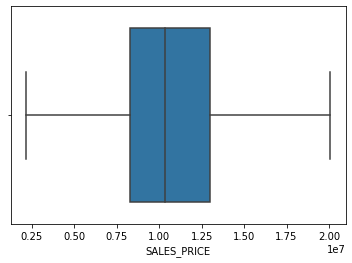

In [54]:
sns.boxplot(df['SALES_PRICE'])

Features Distribution of Dataframe

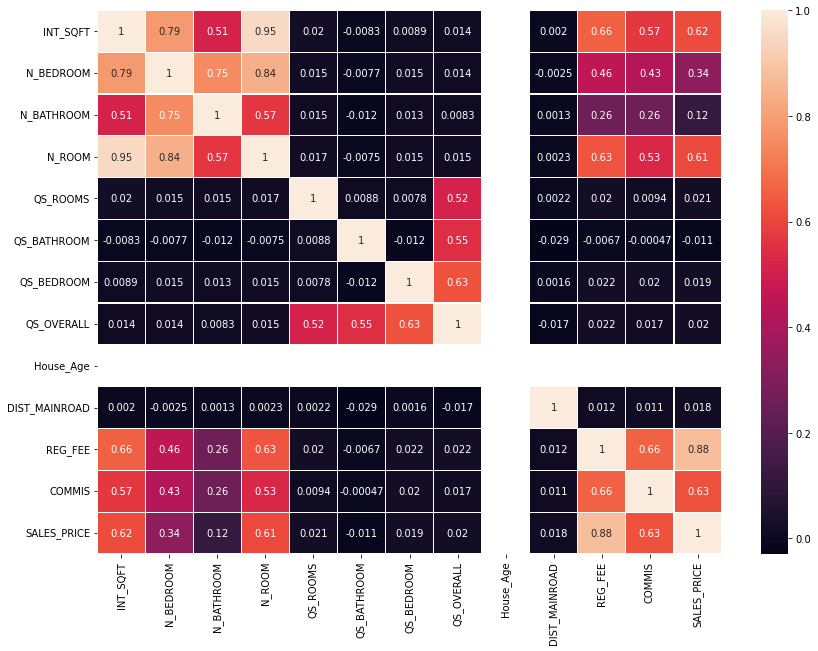

In [55]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, linewidth = 0.2)

In [56]:
# Strong correlation w.r.t sales price are INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOMS.
# Weak correlation are QS_ROOM, QS_BEDROOM, QS_BATHROOM, QS_OVERALL.

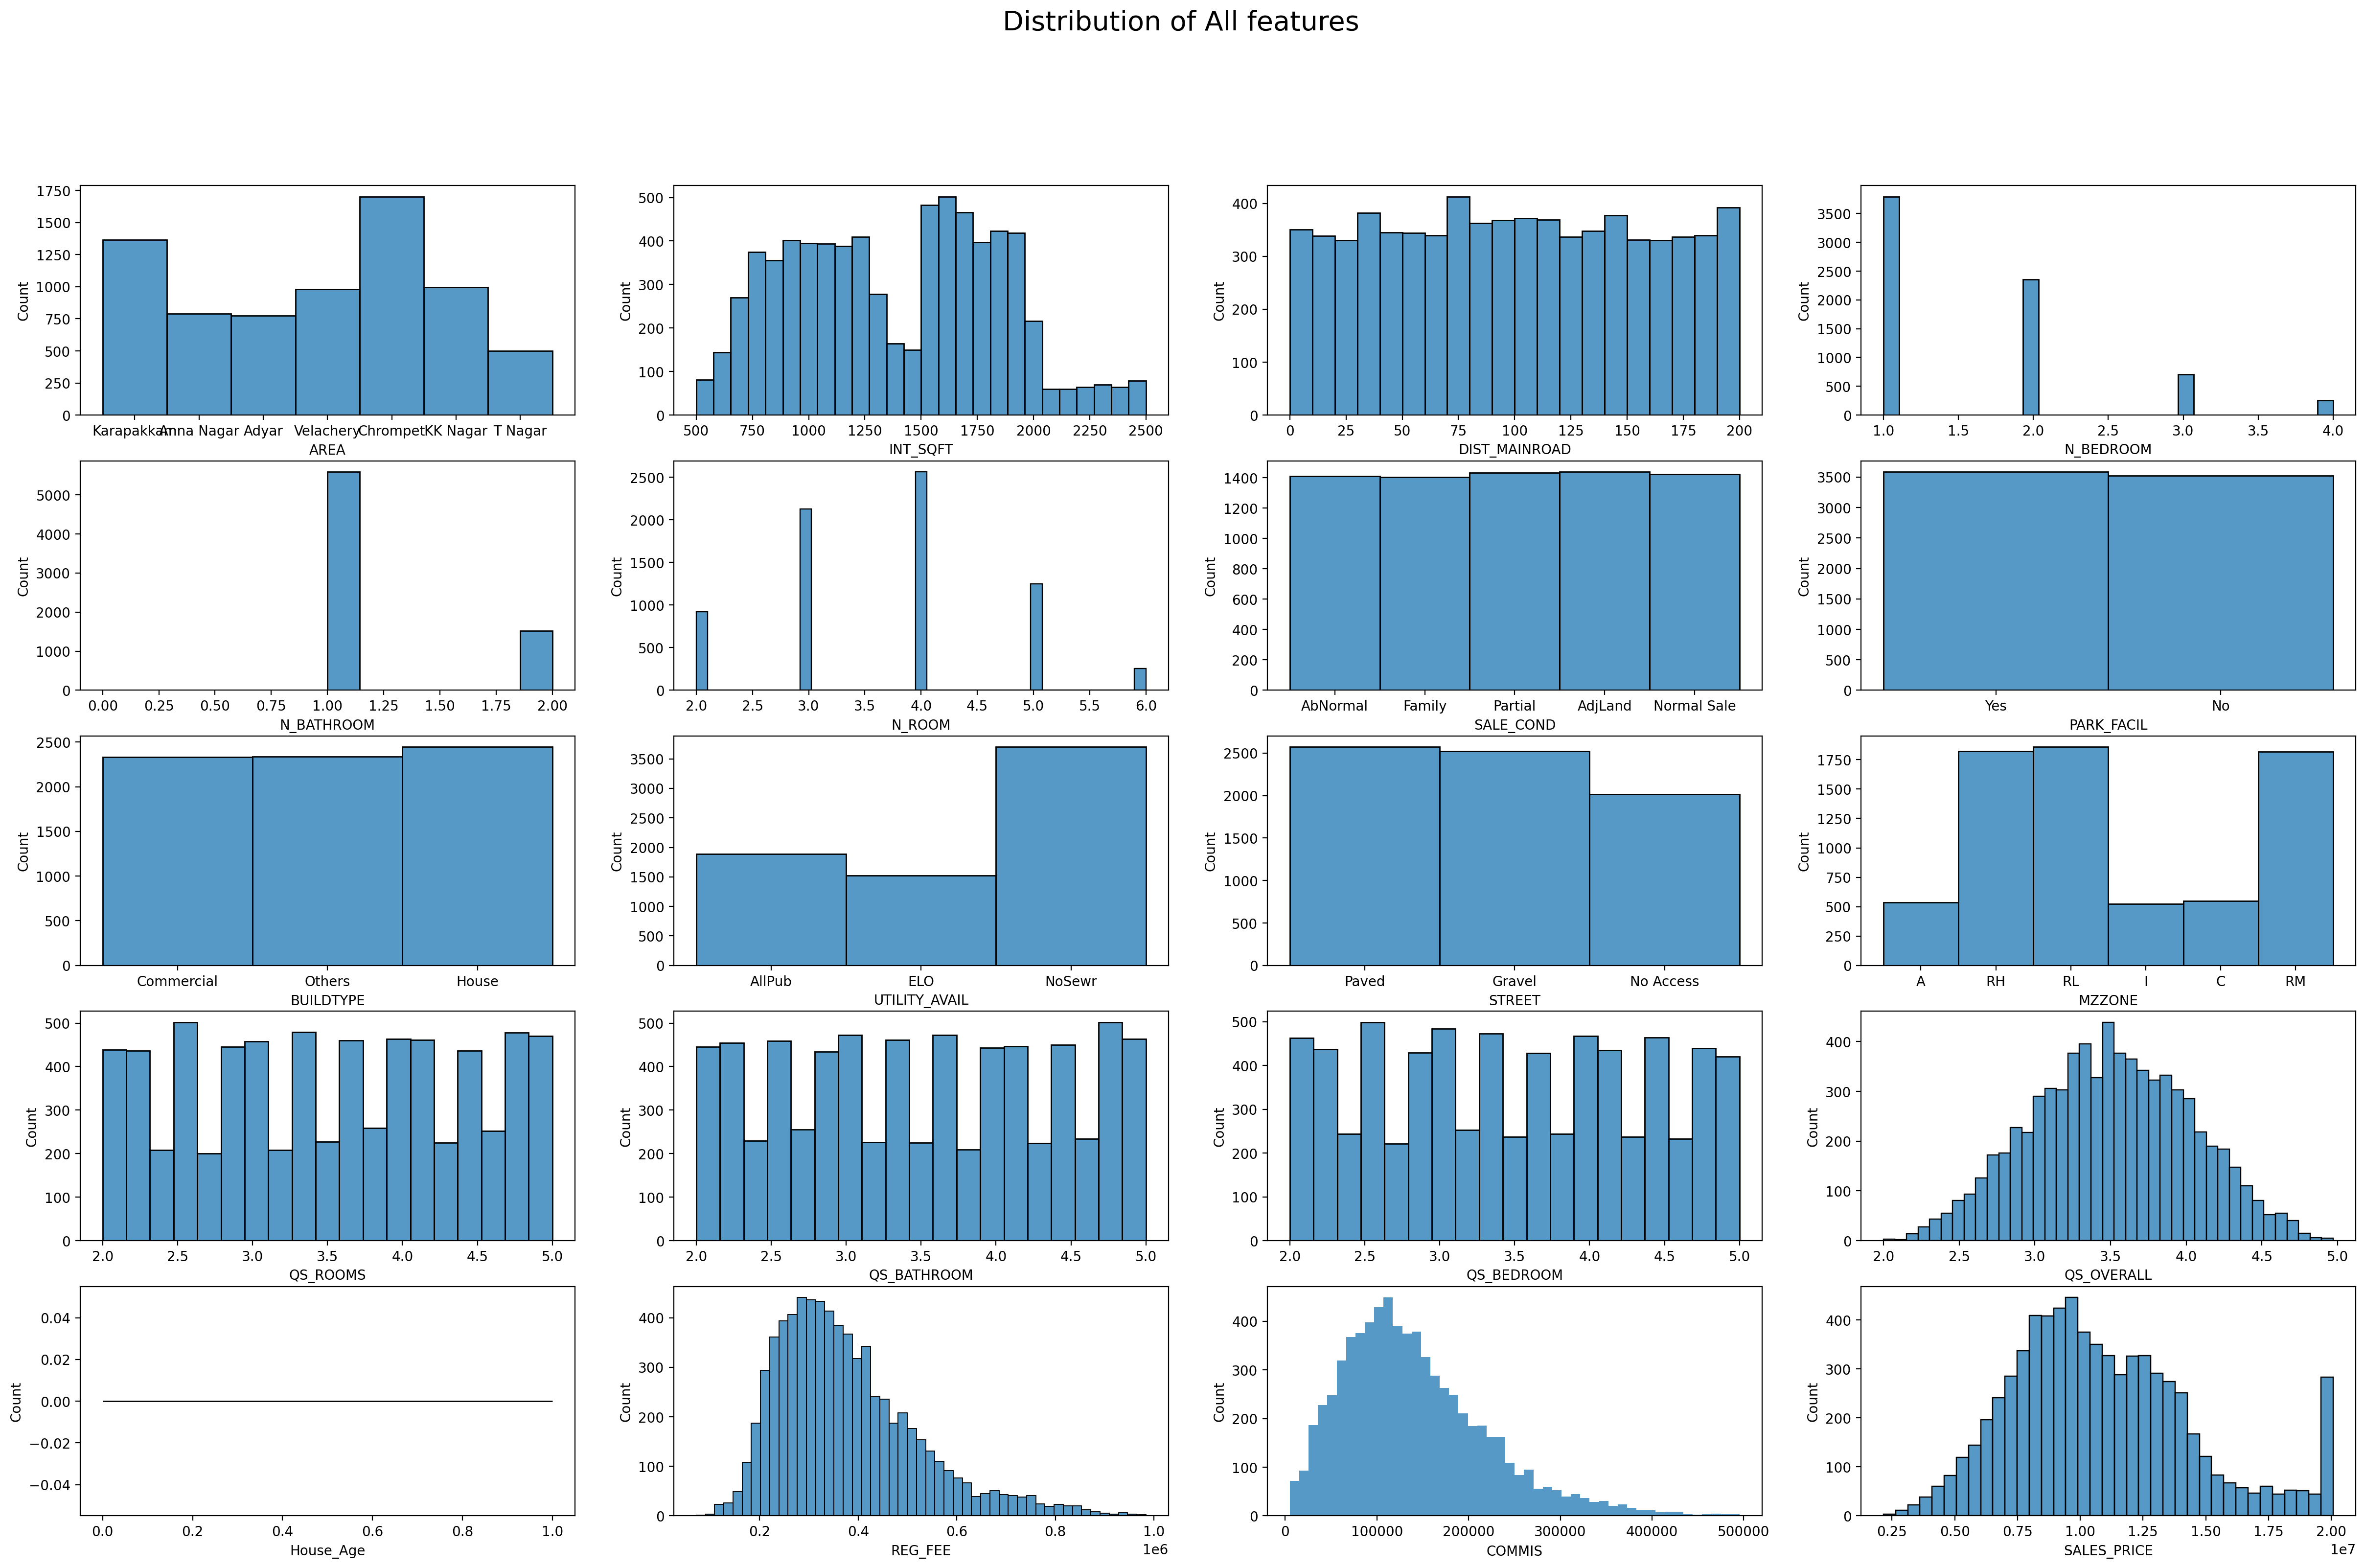

In [57]:
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(df['AREA'])

plt.subplot(5,4,2)
sns.histplot(df['INT_SQFT'])

plt.subplot(5,4,3)
sns.histplot(df['DIST_MAINROAD'])

plt.subplot(5,4,4)
sns.histplot(df['N_BEDROOM'])

plt.subplot(5,4,5)
sns.histplot(df['N_BATHROOM'])

plt.subplot(5,4,6)
sns.histplot(df['N_ROOM'])

plt.subplot(5,4,7)
sns.histplot(df['SALE_COND'])

plt.subplot(5,4,8)
sns.histplot(df['PARK_FACIL'])

plt.subplot(5,4,9)
sns.histplot(df['BUILDTYPE'])

plt.subplot(5,4,10)
sns.histplot(df['UTILITY_AVAIL'])

plt.subplot(5,4,11)
sns.histplot(df['STREET'])

plt.subplot(5,4,12)
sns.histplot(df['MZZONE'])

plt.subplot(5,4,13)
sns.histplot(df['QS_ROOMS'])

plt.subplot(5,4,14)
sns.histplot(df['QS_BATHROOM'])

plt.subplot(5,4,15)
sns.histplot(df['QS_BEDROOM'])

plt.subplot(5,4,16)
sns.histplot(df['QS_OVERALL'])

plt.subplot(5,4,17)
sns.histplot(df['House_Age'])

plt.subplot(5,4,18)
sns.histplot(df['REG_FEE'])

plt.subplot(5,4,19)
sns.histplot(df['COMMIS'], linewidth = 0)

plt.subplot(5,4,20)
sns.histplot(df[ 'SALES_PRICE'])

plt.suptitle("Distribution of All features", fontsize=20)
plt.show()

Dependencies of features with respect to Target feature

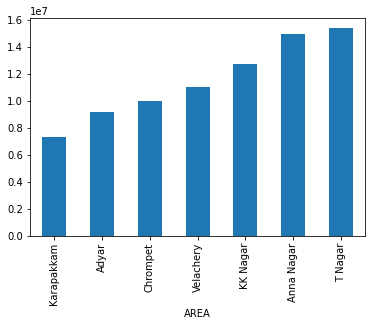

In [58]:
df.groupby('AREA')['SALES_PRICE'].mean().sort_values(ascending = True).plot.bar()

In [59]:
#There is order in data, AREA column with respect to SALES_PRICE

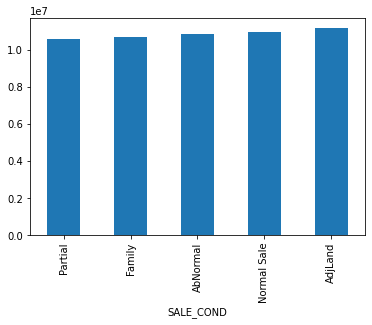

In [60]:
df.groupby('SALE_COND')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [61]:
#We can see there is minimal order in data SALE_COND with respect to SALE_PRICE

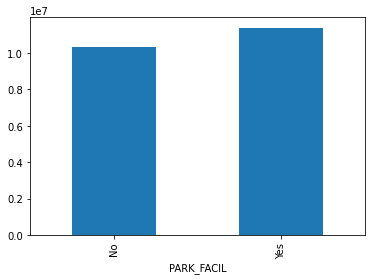

In [62]:
df.groupby('PARK_FACIL')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [63]:
# We can see there is order in data PARK_FACIL with respect to SALE_PRICE

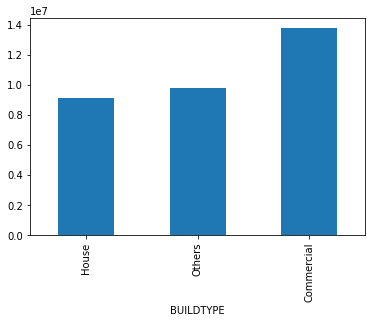

In [64]:
df.groupby('BUILDTYPE')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [65]:
# We can see there is no order in data BUILD_TYPE with respect to SALE_PRICE

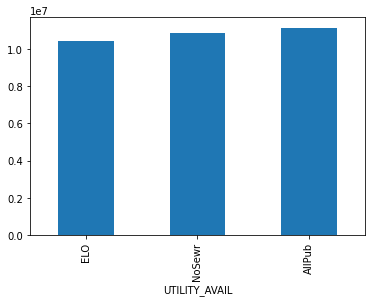

In [66]:
df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [67]:
# We can see there is order in data UTILITY_AVAIL with respect to SALE_PRICE

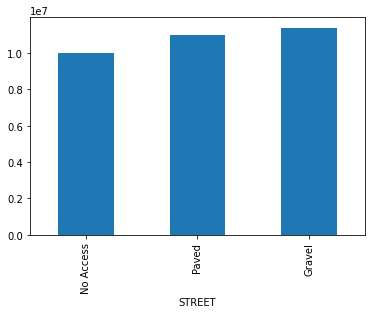

In [68]:
df.groupby('STREET')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [69]:
# We can see there is order in data STREET with respect to SALE_PRICE

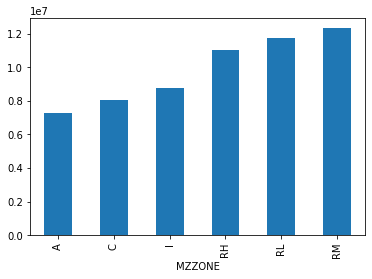

In [70]:
df.groupby('MZZONE')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [71]:
#We can see there is order in data MZZONE with respect to SALE_PRICE, We need to do label encoding for the data

In [72]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'House_Age',
       'DIST_MAINROAD', 'REG_FEE', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

In [73]:
dfp=df

One-Hot Encoding for BUILDTYPE  data

In [74]:
dfp=pd.get_dummies(dfp,columns=['BUILDTYPE'])

Label Encoding for AREA data having order with SALE_PRICE

In [75]:
dfp['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [76]:
dfp['AREA'] = dfp['AREA'].map({'Karapakkam' : 0, 'Adyar' : 1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})

Label Encoding for SALE_COND data having order with SALE_PRICE

In [77]:
dfp['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [78]:
dfp['SALE_COND'] = dfp['SALE_COND'].map({'Partial' : 0, 'Family' : 1,'AbNormal':2,'Normal Sale':3,'AdjLand':4})

Label Encoding for UTILITY_AVAIL data having order with SALE_PRICE

In [79]:
dfp['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr'], dtype=object)

In [80]:
dfp['UTILITY_AVAIL'] = dfp['UTILITY_AVAIL'].map({'ELO' : 0,'NoSewr':1,'AllPub':2})

Label Encoding for STREET data having order with SALE_PRICE

In [81]:
dfp['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [82]:
dfp['STREET'] = dfp['STREET'].map({'No Access' : 0, 'Paved' : 1,'Gravel':2})

Label Encoding for MZZONE data having order with SALE_PRICE

In [83]:
dfp['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [84]:
dfp['MZZONE'] = dfp['MZZONE'].map({'A' : 0, 'C' : 1,'I':2,'RH':3,'RL':4,'RM':5})

Label Encoding for PARK_FACIL data having order with SALE_PRICE

In [85]:
dfp['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [86]:
dfp['PARK_FACIL'] = dfp['PARK_FACIL'].map({'No' : 0, 'Yes' : 1})

In [87]:
dfp.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,...,QS_BEDROOM,QS_OVERALL,House_Age,DIST_MAINROAD,REG_FEE,COMMIS,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,1,1,3,2,1,2,1,0,...,4.9,4.330,NaN,131,380000,144400,7600000.0,1,0,0
1,5,1986,2,1,5,2,0,2,2,3,...,2.5,3.765,NaN,26,760122,304049,20076600.0,1,0,0
2,1,909,1,1,3,2,1,0,2,4,...,2.2,3.090,NaN,70,421094,92114,13159200.0,1,0,0
3,3,1855,3,2,5,1,0,1,1,2,...,3.6,4.010,NaN,14,356321,77042,9630290.0,0,0,1
4,0,1226,1,1,3,2,1,2,2,1,...,4.1,3.290,NaN,84,237000,74063,7406250.0,0,0,1


Plotting the datas

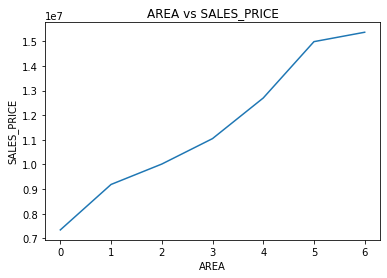

In [88]:
dfp.groupby('AREA')['SALES_PRICE'].mean().plot()
plt.title('AREA vs SALES_PRICE')
plt.xlabel('AREA')
plt.ylabel('SALES_PRICE')
plt.show()

In [89]:
#AREA vs SALES_PRICE have linear relation between them

In [90]:
dfp[['AREA','SALES_PRICE']].corr()
#AREA has good correlation SALES_PRICE of .69

,AREA,SALES_PRICE
AREA,1.000000,0.697301
SALES_PRICE,0.697301,1.000000


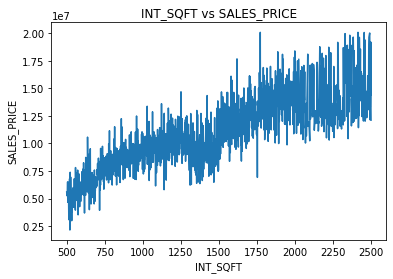

In [91]:
dfp.groupby('INT_SQFT')['SALES_PRICE'].mean().plot()
plt.xlabel('INT_SQFT')
plt.ylabel('SALES_PRICE')
plt.title('INT_SQFT vs SALES_PRICE')
plt.show()

In [92]:
#INT_SQFT has linear relationshipt with SALES_PRICE and good correlation value
dfp[['INT_SQFT','SALES_PRICE']].corr()

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.617711
SALES_PRICE,0.617711,1.000000


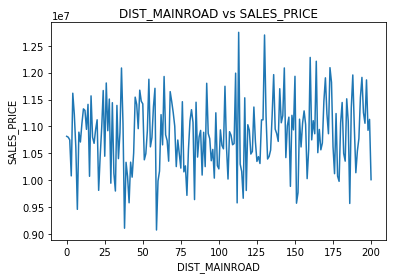

In [93]:
dfp.groupby('DIST_MAINROAD')['SALES_PRICE'].mean().plot()
plt.xlabel('DIST_MAINROAD')
plt.ylabel('SALES_PRICE')
plt.title('DIST_MAINROAD vs SALES_PRICE')
plt.show()

In [94]:
dfp[['DIST_MAINROAD','SALES_PRICE']].corr()

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.00000,0.01795
SALES_PRICE,0.01795,1.00000


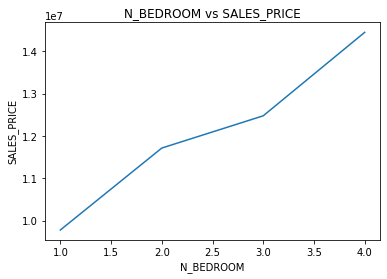

In [95]:
dfp.groupby('N_BEDROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('N_BEDROOM')
plt.ylabel('SALES_PRICE')
plt.title('N_BEDROOM vs SALES_PRICE')
plt.show()

In [96]:
dfp[['N_BEDROOM','SALES_PRICE']].corr()

,N_BEDROOM,SALES_PRICE
N_BEDROOM,1.000000,0.337256
SALES_PRICE,0.337256,1.000000


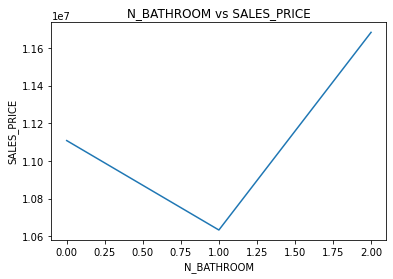

In [97]:
dfp.groupby('N_BATHROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('N_BATHROOM')
plt.ylabel('SALES_PRICE')
plt.title('N_BATHROOM vs SALES_PRICE')
plt.show()

In [98]:
dfp[['N_BATHROOM','SALES_PRICE']].corr()

,N_BATHROOM,SALES_PRICE
N_BATHROOM,1.000000,0.116822
SALES_PRICE,0.116822,1.000000


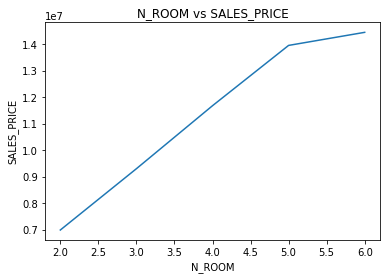

In [99]:
dfp.groupby('N_ROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('N_ROOM')
plt.ylabel('SALES_PRICE')
plt.title('N_ROOM vs SALES_PRICE')
plt.show()

In [100]:
dfp[['N_ROOM','SALES_PRICE']].corr()

,N_ROOM,SALES_PRICE
N_ROOM,1.000000,0.607691
SALES_PRICE,0.607691,1.000000


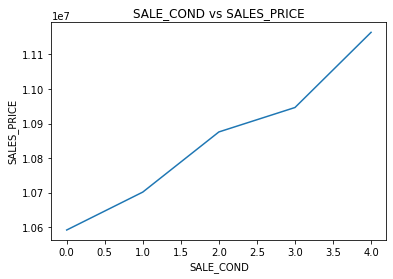

In [101]:
dfp.groupby('SALE_COND')['SALES_PRICE'].mean().plot()
plt.xlabel('SALE_COND')
plt.ylabel('SALES_PRICE')
plt.title('SALE_COND vs SALES_PRICE')
plt.show()

In [102]:
dfp[['SALE_COND','SALES_PRICE']].corr()

,SALE_COND,SALES_PRICE
SALE_COND,1.000000,0.053732
SALES_PRICE,0.053732,1.000000


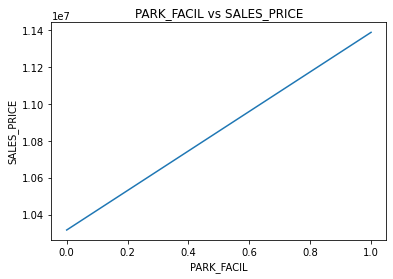

In [103]:
dfp.groupby('PARK_FACIL')['SALES_PRICE'].mean().plot()
plt.xlabel('PARK_FACIL')
plt.ylabel('SALES_PRICE')
plt.title('PARK_FACIL vs SALES_PRICE')
plt.show()

In [104]:
dfp[['PARK_FACIL','SALES_PRICE']].corr()

,PARK_FACIL,SALES_PRICE
PARK_FACIL,1.00000,0.14594
SALES_PRICE,0.14594,1.00000


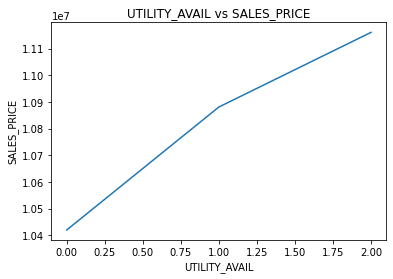

In [105]:
dfp.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().plot()
plt.xlabel('UTILITY_AVAIL')
plt.ylabel('SALES_PRICE')
plt.title('UTILITY_AVAIL vs SALES_PRICE')
plt.show()

In [106]:
dfp[['UTILITY_AVAIL','SALES_PRICE']].corr()

,UTILITY_AVAIL,SALES_PRICE
UTILITY_AVAIL,1.000000,0.068916
SALES_PRICE,0.068916,1.000000


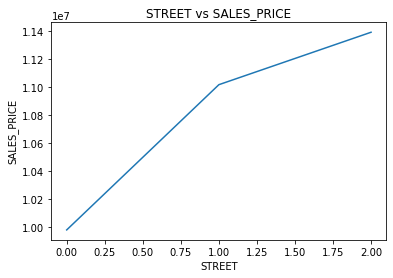

In [107]:
dfp.groupby('STREET')['SALES_PRICE'].mean().plot()
plt.xlabel('STREET')
plt.ylabel('SALES_PRICE')
plt.title('STREET vs SALES_PRICE')
plt.show()

In [108]:
dfp[['STREET','SALES_PRICE']].corr()

,STREET,SALES_PRICE
STREET,1.000000,0.150745
SALES_PRICE,0.150745,1.000000


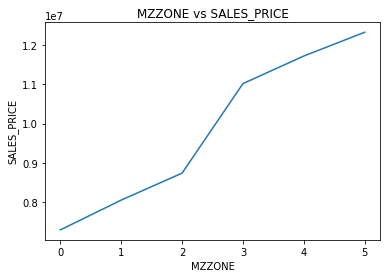

In [109]:
dfp.groupby('MZZONE')['SALES_PRICE'].mean().plot()
plt.xlabel('MZZONE')
plt.ylabel('SALES_PRICE')
plt.title('MZZONE vs SALES_PRICE')
plt.show()

In [110]:
dfp[['MZZONE','SALES_PRICE']].corr()

,MZZONE,SALES_PRICE
MZZONE,1.000000,0.432422
SALES_PRICE,0.432422,1.000000


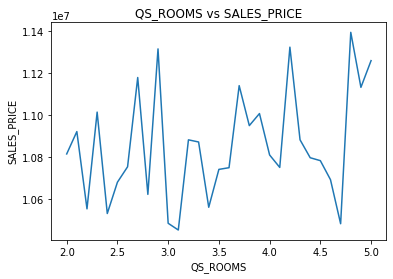

In [111]:
dfp.groupby('QS_ROOMS')['SALES_PRICE'].mean().plot()
plt.xlabel('QS_ROOMS')
plt.ylabel('SALES_PRICE')
plt.title('QS_ROOMS vs SALES_PRICE')
plt.show()

In [112]:
dfp[['QS_ROOMS','SALES_PRICE']].corr()

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.000000,0.021389
SALES_PRICE,0.021389,1.000000


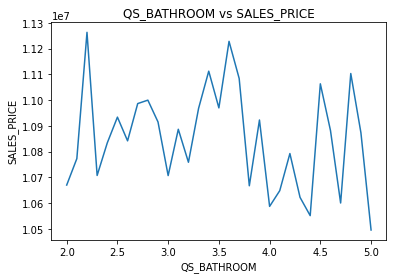

In [113]:
dfp.groupby('QS_BATHROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('QS_BATHROOM')
plt.ylabel('SALES_PRICE')
plt.title('QS_BATHROOM vs SALES_PRICE')
plt.show()

In [114]:
dfp[['QS_BATHROOM','SALES_PRICE']].corr()

,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.000000,-0.011077
SALES_PRICE,-0.011077,1.000000


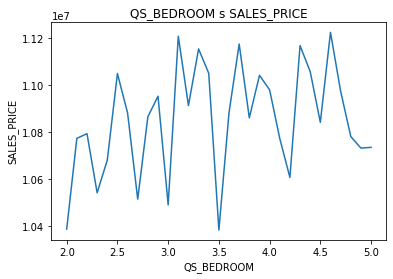

In [115]:
dfp.groupby('QS_BEDROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('QS_BEDROOM')
plt.ylabel('SALES_PRICE')
plt.title('QS_BEDROOM s SALES_PRICE')
plt.show()

In [116]:
dfp[['QS_BEDROOM','SALES_PRICE']].corr()

,QS_BEDROOM,SALES_PRICE
QS_BEDROOM,1.000000,0.018838
SALES_PRICE,0.018838,1.000000


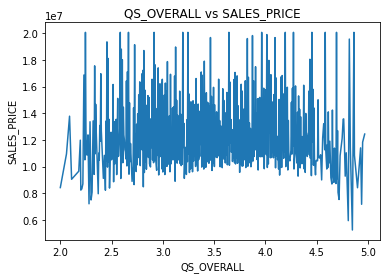

In [117]:
dfp.groupby('QS_OVERALL')['SALES_PRICE'].mean().plot()
plt.xlabel('QS_OVERALL')
plt.ylabel('SALES_PRICE')
plt.title('QS_OVERALL vs SALES_PRICE')
plt.show()

In [118]:
dfp[['QS_OVERALL','SALES_PRICE']].corr()

,QS_OVERALL,SALES_PRICE
QS_OVERALL,1.000000,0.020239
SALES_PRICE,0.020239,1.000000


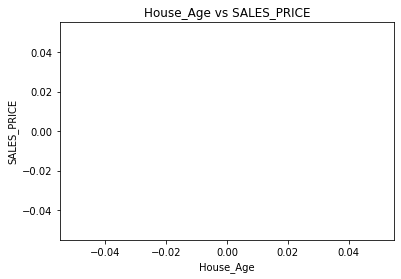

In [119]:
dfp.groupby('House_Age')['SALES_PRICE'].mean().plot()
plt.xlabel('House_Age')
plt.ylabel('SALES_PRICE')
plt.title('House_Age vs SALES_PRICE')
plt.show()

In [120]:
dfp[['House_Age','SALES_PRICE']].corr()

,House_Age,SALES_PRICE
House_Age,NaN,NaN
SALES_PRICE,NaN,1.0


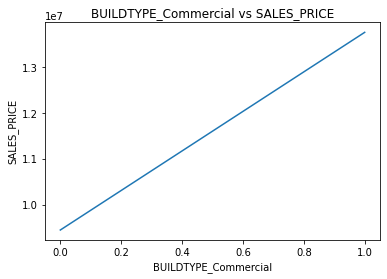

In [121]:
dfp.groupby('BUILDTYPE_Commercial')['SALES_PRICE'].mean().plot()
plt.xlabel('BUILDTYPE_Commercial')
plt.ylabel('SALES_PRICE')
plt.title('BUILDTYPE_Commercial vs SALES_PRICE')
plt.show()

In [122]:
dfp[['BUILDTYPE_Commercial','SALES_PRICE']].corr()

,BUILDTYPE_Commercial,SALES_PRICE
BUILDTYPE_Commercial,1.000000,0.551723
SALES_PRICE,0.551723,1.000000


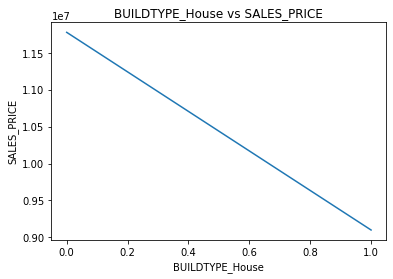

In [123]:
dfp.groupby('BUILDTYPE_House')['SALES_PRICE'].mean().plot()
plt.xlabel('BUILDTYPE_House')
plt.ylabel('SALES_PRICE')
plt.title('BUILDTYPE_House vs SALES_PRICE')
plt.show()

In [124]:
dfp[['BUILDTYPE_House','SALES_PRICE']].corr()

,BUILDTYPE_House,SALES_PRICE
BUILDTYPE_House,1.000000,-0.347201
SALES_PRICE,-0.347201,1.000000


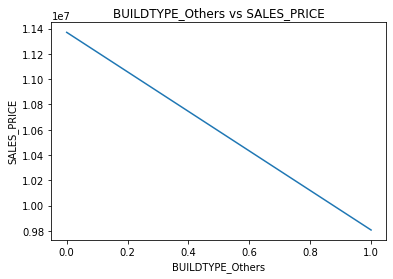

In [125]:
dfp.groupby('BUILDTYPE_Others')['SALES_PRICE'].mean().plot()
plt.xlabel('BUILDTYPE_Others')
plt.ylabel('SALES_PRICE')
plt.title('BUILDTYPE_Others vs SALES_PRICE')
plt.show()

In [126]:
dfp[['BUILDTYPE_Others','SALES_PRICE']].corr()

,BUILDTYPE_Others,SALES_PRICE
BUILDTYPE_Others,1.000000,-0.200204
SALES_PRICE,-0.200204,1.000000


In [127]:
#['DIST_MAINROAD','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL','House_Age'] these array of columns dont have linear relationship with SALES_PRICE. So dropping them from dataframe
# 'REG_FEE', 'COMMIS' are completely dependent on SALES_PRICE and are paid once property sold. So these two features dont contribute to Sales prediction and dropping from dataframe
dfp=dfp.drop(columns=['DIST_MAINROAD','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL','House_Age', 'REG_FEE', 'COMMIS'])

In [128]:
dfp.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,1,1,3,2,1,2,1,0,7600000.0,1,0,0
1,5,1986,2,1,5,2,0,2,2,3,20076600.0,1,0,0
2,1,909,1,1,3,2,1,0,2,4,13159200.0,1,0,0
3,3,1855,3,2,5,1,0,1,1,2,9630290.0,0,0,1
4,0,1226,1,1,3,2,1,2,2,1,7406250.0,0,0,1


In [129]:
dfp =dfp.reindex(columns=['AREA','INT_SQFT','N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL','UTILITY_AVAIL','STREET', 'MZZONE','BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others','SALES_PRICE'])
#dfp=dfp.reindex(columns=['AREA','INT_SQFT','N_BEDROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL','UTILITY_AVAIL','STREET', 'MZZONE','BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others','SALES_PRICE'])
dfp.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,SALES_PRICE
0,0,1004,1,1,3,2,1,2,1,0,1,0,0,7600000.0
1,5,1986,2,1,5,2,0,2,2,3,1,0,0,20076600.0
2,1,909,1,1,3,2,1,0,2,4,1,0,0,13159200.0
3,3,1855,3,2,5,1,0,1,1,2,0,0,1,9630290.0
4,0,1226,1,1,3,2,1,2,2,1,0,0,1,7406250.0


In [130]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AREA                  7109 non-null   int64  
 1   INT_SQFT              7109 non-null   int64  
 2   N_BEDROOM             7109 non-null   int64  
 3   N_BATHROOM            7109 non-null   int64  
 4   N_ROOM                7109 non-null   int64  
 5   SALE_COND             7109 non-null   int64  
 6   PARK_FACIL            7109 non-null   int64  
 7   UTILITY_AVAIL         7109 non-null   int64  
 8   STREET                7109 non-null   int64  
 9   MZZONE                7109 non-null   int64  
 10  BUILDTYPE_Commercial  7109 non-null   uint8  
 11  BUILDTYPE_House       7109 non-null   uint8  
 12  BUILDTYPE_Others      7109 non-null   uint8  
 13  SALES_PRICE           7109 non-null   float64
dtypes: float64(1), int64(10), uint8(3)
memory usage: 687.3 KB


Finding the best values of r2 score from the below models:

In [131]:
#Extracting  features values to split the data into TRAIN and TEST
X=dfp[dfp.columns[:-1]].values
Y=dfp['SALES_PRICE'].values

In [132]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)
#Dataset has been split into two sets, train and test data train data with 75% and test data of 25%

In [133]:
#Scaling the data as many of the data are encoded to smaller values where as INT_SQFT is numerical larger number
#Scaling helps data to normalize
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
# Modelling the data using LinearRegression
# from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [135]:
# Predict the values using test data
y_predLR = regressor.predict(X_test_scaled)

In [136]:
# Check evaluation metric for the model
# from sklearn import metrics 
print('R2- SCORE for linear Regression:', metrics.r2_score(y_test,y_predLR))

R2- SCORE for linear Regression: 0.9256137034676584


In [137]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50,100]:
  knn = KNeighborsRegressor(n_neighbors=i) #initialising the model
  knn.fit(X_train_scaled, y_train) # training the model
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10))) #predicting using the model

K value  :  1  score :  0.9269650127422213
K value  :  2  score :  0.9432034500086719
K value  :  3  score :  0.9472299890467177
K value  :  4  score :  0.9484584041067216
K value  :  5  score :  0.9487511587042053
K value  :  6  score :  0.9486420162367557
K value  :  7  score :  0.948524708974149
K value  :  8  score :  0.948241890612303
K value  :  9  score :  0.9480685315999384
K value  :  10  score :  0.947139975433456
K value  :  20  score :  0.9384583181572713
K value  :  50  score :  0.9138408452695286
K value  :  100  score :  0.890775824487673


In [138]:
# With K=5 ,we have  better cross value score of 0.9535

In [139]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_predknn = knn.predict(X_test_scaled)
print('R2- SCORE for KNN:', metrics.r2_score(y_test,y_predknn))

R2- SCORE for KNN: 0.9502428464598582


In [140]:
# R2 score for KNN algorithm is 0.95 , Better than Linear Regression

In [141]:
# from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print('R2- SCORE for Decision Tree algorithm:', metrics.r2_score(y_test,y_pred_dt))

R2- SCORE for Decision Tree algorithm: 0.9737318259511706


In [142]:
# from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 100, max_depth = 11, max_features='sqrt')
#rf = RandomForestRegressor(n_estimators= 100, max_depth=3, max_features='sqrt')
rf.fit(X_train_scaled, y_train);
y_pred_rf = rf.predict(X_test_scaled)
print('R2- SCORE for Random Forest algorithm with max_depth of 11:', metrics.r2_score(y_test,y_pred_rf))

R2- SCORE for Random Forest algorithm with max_depth of 11: 0.9815366136274879


In [143]:
rf3 = RandomForestRegressor(n_estimators= 100, max_depth=3, max_features='sqrt')
rf3.fit(X_train_scaled, y_train);
y_pred_rf = rf3.predict(X_test_scaled)
print('R2- SCORE for Random Forest algorithm with max_depth of 3:', metrics.r2_score(y_test,y_pred_rf))

R2- SCORE for Random Forest algorithm with max_depth of 3: 0.792664345293714


To avoid overfitting of model features are trimed to log(11)/log(2)


In [144]:
original_feature_list=list(dfp[dfp.columns[:-1]].columns)
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: BUILDTYPE_Commercial Importance: 0.23
Variable: AREA                 Importance: 0.22
Variable: INT_SQFT             Importance: 0.18
Variable: N_ROOM               Importance: 0.1
Variable: MZZONE               Importance: 0.09
Variable: BUILDTYPE_House      Importance: 0.06
Variable: N_BEDROOM            Importance: 0.04
Variable: BUILDTYPE_Others     Importance: 0.04
Variable: N_BATHROOM           Importance: 0.01
Variable: SALE_COND            Importance: 0.01
Variable: PARK_FACIL           Importance: 0.01
Variable: STREET               Importance: 0.01
Variable: UTILITY_AVAIL        Importance: 0.0


As per the Random Forest feature importance, Above are the important features, only utility_available is least importance and Area,Build_type,SQFT are more important features

In [145]:
# import xgboost as xgb
# from sklearn.model_selection import cross_val_score
# import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train_scaled, y_train) #train the model
  model.score(X_train_scaled, y_train) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled, y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.43968529249669186  Cross-Val score :  -0.4497958001208935
Learning rate :  0.02  Train score :  0.7377059139957679  Cross-Val score :  0.7335999694832473
Learning rate :  0.03  Train score :  0.9226677047420702  Cross-Val score :  0.9197525884853416
Learning rate :  0.04  Train score :  0.9608841511841517  Cross-Val score :  0.9583964486187565
Learning rate :  0.05  Train score :  0.9732407871856101  Cross-Val score :  0.9705592697395895
Learning rate :  0.06  Train score :  0.9789226859946272  Cross-Val score :  0.9768269458013581
Learning rate :  0.07  Train score :  0.9832966941998068  Cross-Val score :  0.9813733199123172
Learning rate :  0.08  Train score :  0.9858892371901679  Cross-Val score :  0.9841490033741724
Learning rate :  0.09  Train score :  0.9883253115392608  Cross-Val score :  0.9862451289973144
Learning rate :  0.1  Train score :  0.9893559690397763  Cross-Val score :  0.9879386088213185
Learning rate :  0.11  Train score :  

In [146]:
#For Learning rate of 0.7, we have better cross validation score.
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(X_train_scaled, y_train) #train the model
y_pred_xgb = model.predict(X_test_scaled)
print('R2- SCORE for XG Boost:', metrics.r2_score(y_test,y_pred_xgb))

[16:25:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2- SCORE for XG Boost: 0.9927376056665927


Conclusion

In [147]:
# Considering all regression models and their R2 score for trained data and test data, from these we found out best score from XGBoost is well fitted and provided 99% accuracy.